# 误差

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.datasets import load_iris

In [7]:
iris=load_iris()
X, y = iris.data,iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=76)
X_train_xgb, X_train_lr, y_train_xgb, y_train_lr = train_test_split(X_train, y_train, test_size=0.75, random_state=76)

In [10]:
train_xgb_dm = xgb.DMatrix(data=X_train_xgb, label=y_train_xgb, nthread=8)
valid_xgb_dm = xgb.DMatrix(data=X_test, label=y_test)

In [1]:
#### 模型评分

from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

print("F1 Score:", f1_score(y_test, y_infer, average='weighted'))
print("AUC Score:", roc_auc_score(y_test, y_infer))
print("Accuracy Score:", accuracy_score(y_test, y_infer))

NameError: name 'y_test' is not defined

# 混淆矩阵

## 支持向量机

In [45]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=76)

In [44]:
import joblib

svc_model = joblib.load('../mold/svc.joblib')

In [48]:
y_infer = svc_model.predict(X=X_valid)

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

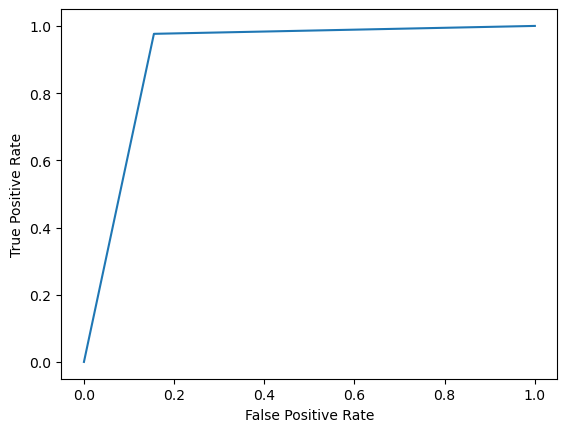

In [59]:
fpr, tpr, _ = roc_curve(y_valid, y_infer, pos_label=svc_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()

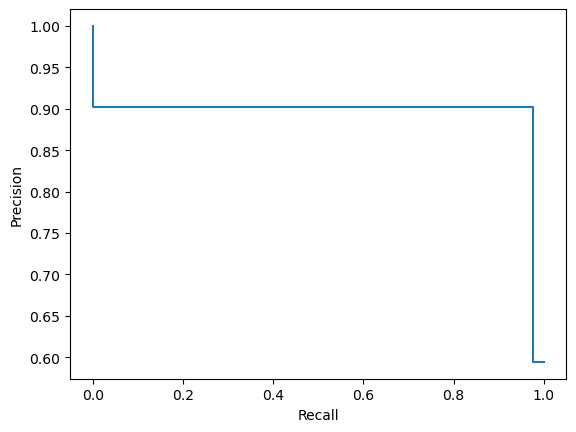

In [57]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
precision, recall, _ = precision_recall_curve(y_valid, y_infer)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

### 提升树

In [13]:
import xgboost as xgb
from sklearn import metrics

xgb_model = xgb.Booster()
xgb_model.load_model('../mold/xgb_multi_logistic.ubj')

In [27]:
y_pred = xgb_model.predict(valid_xgb_dm)

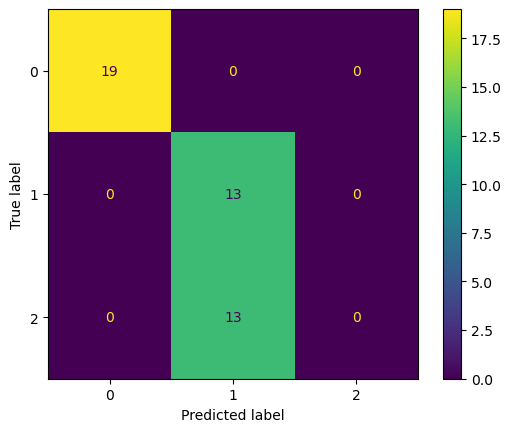

In [20]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred=y_predict, labels=[0,1,2])
display = ConfusionMatrixDisplay(cm)

display.plot(
    include_values=True,
    cmap='viridis',
    ax=None,
    xticks_rotation='horizontal',
    values_format='d'
)


# 函数图

## 二分类

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

### ROC AUC

In [42]:
fpr,tpr,thres_lr = roc_curve(y_test,y_pred)
plt.plot(fpt, tpr)

ValueError: multiclass format is not supported

### PR

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import precision_score,f1_score

# micro：多分类　　
# weighted：不均衡数量的类来说，计算二分类metrics的平均
# macro：计算二分类metrics的均值，为每个类给出相同权重的分值。
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_score = f1_score(y_test, y_pred, average='weighted')
accuracy_score = accuracy_score(y_test, y_pred)

# accuracy_score = accuracy_score(y_test, y_pred)
print("Precision_score:",precision)
print("Recall_score:",recall)
# F1-Score = 2* 精确分数 * 召回分数/ （精确分数 + 召回分数/）
print("F1_score:",f1_score)
print("Accuracy_score:",accuracy_score)


Precision_score: 0.5666666666666667
Recall_score: 0.7111111111111111
F1_score: 0.6148148148148148
Accuracy_score: 0.7111111111111111


/data/home/its/VirtualReality/conda/miniforge/envs/bion/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:

plt.plot(recall, precision)

ValueError: multiclass format is not supported

# 多分类

In [21]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
classifier = OneVsRestClassifier(y_predict)
y_score = classifier.fit(X=y_train_xgb, y=y_train_xgb).decision_function(X=X_test)
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
# 计算每个类别的ROC曲线和ROC面积
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true=y_test[:, i], y_score=y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 计算微观平均(micro-average)ROC曲线和ROC面积
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 首先汇总所有误报false positive率
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# 然后在这些点内插(interpolate)所有的ROC曲线
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# 最后求平均值并计算AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# 绘制所有的ROC曲线
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))